In [24]:
import numpy
import pandas as pd
import numpy as np
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BayesianEstimator
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
puma_05 = pd.read_csv("../Data/Cleaned/puma_05.csv")

In [4]:
puma_05.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
puma_05.columns

Index([u'SERIALNO', u'Official_Poverty', u'CEO_Income', u'FICAtax',
       u'PovunitType', u'EducAttain_2', u'WorkExpIndiv', u'Povunit',
       u'IncomeTax', u'ACR', u'SchoolBreakfast', u'HEAP', u'CitizenStatus',
       u'Official_Threshold', u'AgeCateg_2', u'AgeCateg_3', u'EducAttain_4',
       u'CEO_Poverty', u'PUMA', u'WIC', u'EducAttain_ ', u'HousingStatus',
       u'WorkersEquiv', u'SchoolLunch', u'CEO_Threshold', u'AgeCateg_1',
       u'Boro', u'MOOP', u'MV', u'Childcare', u'EducAttain_3', u'PreTaxIncome',
       u'NP', u'EducAttain_1', u'FoodStamps', u'JWTR', u'Commuting',
       u'Housing', u'Ethnicity'],
      dtype='object')

In [43]:
thresholds = pd.Series(puma_05.CEO_Threshold.unique())

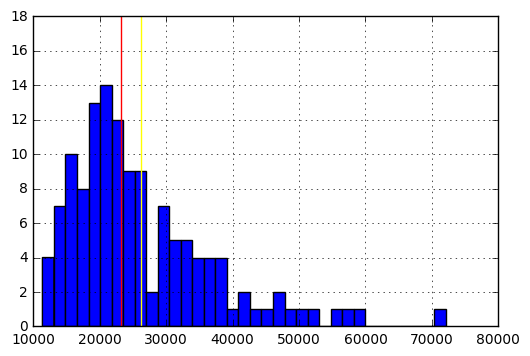

In [44]:
thresholds.hist(bins=35)
plt.vlines(x=thresholds.median(), ymin=0, ymax=18, color = 'red')
plt.vlines(x=thresholds.mean(), ymin=0, ymax=18, color = 'yellow')

In [110]:
puma_05[puma_05.CEO_Threshold == puma_05.CEO_Threshold.max()]

,SERIALNO,PUMA,Official_Poverty,AgeCateg,CitizenStatus,CEO_Poverty,Official_Threshold,MOOP,Nabe,EducAttain,...,CD,CEO_Income,Housing,CEO_Threshold,IncomeTax,HousingStatus,WIC,Childcare,Povunit,WorkersEquiv
7359,370930,3706,2,2,1,2,37757,0.0,6,1,...,5,146578.838247,5201.448444,72117.007717,-9017.567239,4,0.0,0.0,1,1


In [45]:
thresholds.describe()

count      131.000000
mean     26200.793166
std      10917.609603
min      11369.675603
25%      19059.902619
50%      23272.281307
75%      31344.462632
max      72117.007717
dtype: float64

In [46]:
thresholds.quantile(0.99)

58369.204870079979

In [47]:
thresholds_of = pd.Series(puma_05.Official_Threshold.unique())

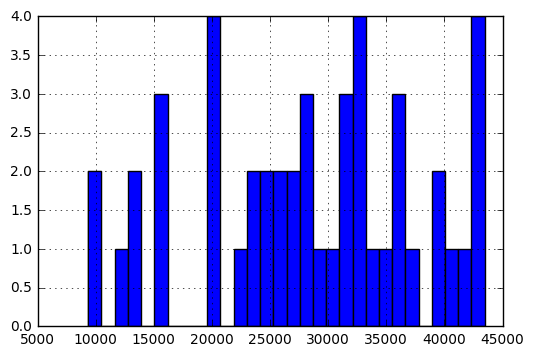

In [48]:
thresholds_of.hist(bins=30)

In [49]:
puma_14 = pd.read_csv("../Data/Cleaned/puma_14.csv")

In [50]:
puma_14.drop(['Unnamed: 0'], axis=1, inplace=True)

In [51]:
thresholds_14 = pd.Series(puma_14.CEO_Threshold.unique())

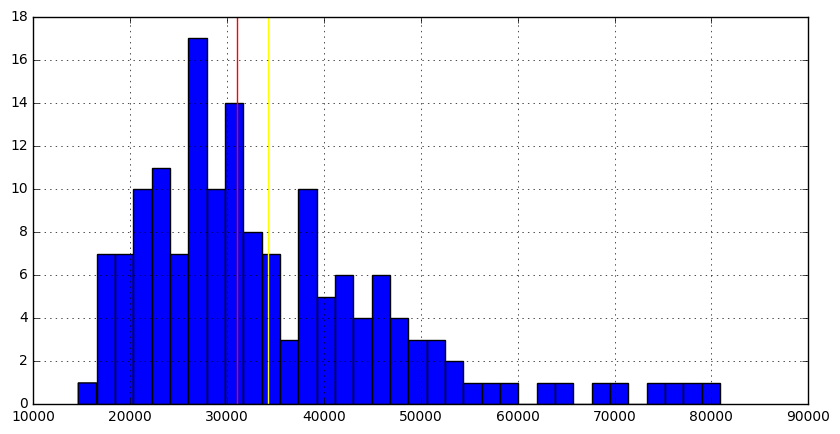

In [52]:
thresholds_14.hist(bins=35, figsize=(10,5))
plt.vlines(x=thresholds_14.median(), ymin=0, ymax=18, color = 'red')
plt.vlines(x=thresholds_14.mean(), ymin=0, ymax=18, color = 'yellow')

In [53]:
thresholds_14_of = pd.Series(puma_14.Official_Threshold.unique())

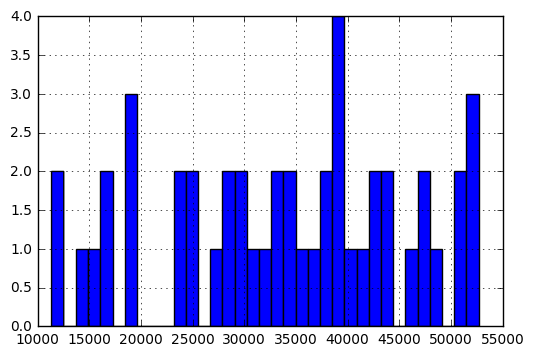

In [54]:
thresholds_14_of.hist(bins=35)

In [55]:
puma_10 = pd.read_csv("../Data/Cleaned/puma_10.csv")

In [56]:
puma_10.drop(['Unnamed: 0'], axis=1, inplace=True)

In [57]:
thresholds_10 = pd.Series(puma_10.CEO_Threshold.unique())

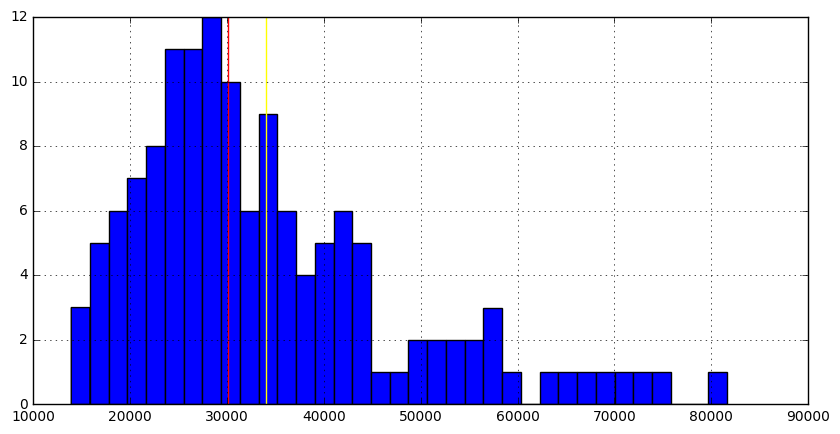

In [58]:
thresholds_10.hist(bins=35, figsize=(10,5))
plt.vlines(x=thresholds_10.median(), ymin=0, ymax=12, color = 'red')
plt.vlines(x=thresholds_10.mean(), ymin=0, ymax=12, color = 'yellow')

In [78]:
puma_threshold0 = puma_05.groupby('PUMA').agg({'CEO_Threshold':'mean'}).reset_index()
puma_threshold0.columns = ['PUMA', 'Threshold0']

In [79]:
df = pd.merge(puma_05, puma_threshold0, on='PUMA', how='inner')

In [80]:
df['Threshold1'] = 1.5 * df.Threshold0 

In [93]:
for i in xrange(len(df)):
    if (df.CEO_Income[i] >= df.Threshold0[i]) & (df.CEO_Income[i] <= df.Threshold1[i]):
        df.loc[i,'Pov_risk'] = 1
    elif (df.CEO_Income[i] < df.Threshold0[i]):
        df.loc[i, 'Pov_risk'] = 0
    elif (df.CEO_Income[i] > df.Threshold1[i]):
        df.loc[i, 'Pov_risk'] = 2

In [83]:
def create_thresholds(puma):
    
    threshold0 = puma.groupby('PUMA').agg({'CEO_Threshold':'mean'}).reset_index()
    threshold0.columns = ['PUMA', 'CEO_Threshold_mean']
    puma = pd.merge(puma, threshold0, on='PUMA', how='inner')
    puma['Threshold1'] = 1.5 * puma.Threshold0 
    create_label(puma)

In [86]:
def create_label(puma):
    print puma
    if (puma.CEO_Income >= df.Threshold0) & (df.CEO_Income <= df.Threshold1):
        df['Pov_risk'] = 1
    elif (df.CEO_Income < df.Threshold0):
        df['Pov_risk'] = 0
    elif (df.CEO_Income > df.Threshold1):
        df['Pov_risk'] = 2

# New check without aggregation

In [6]:
puma_05.CEO_Income.describe()

count     24700.000000
mean      46680.881789
std       48565.104282
min      -62079.462714
25%       18775.897667
50%       33989.774250
75%       58077.278595
max      631767.710509
Name: CEO_Income, dtype: float64

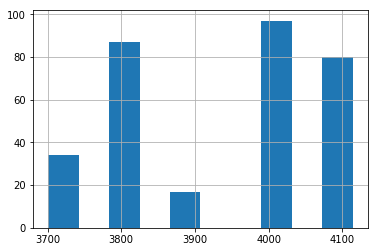

In [7]:
puma_05[puma_05.CEO_Income < 0]['PUMA'].hist()

In [8]:
puma_05[puma_05.SERIALNO == 812]

,SERIALNO,Official_Poverty,CEO_Income,FICAtax,PovunitType,EducAttain_2,WorkExpIndiv,Povunit,IncomeTax,ACR,...,Childcare,EducAttain_3,PreTaxIncome,NP,EducAttain_1,FoodStamps,JWTR,Commuting,Housing,Ethnicity
20,812,1,-4.0,0.0,8,1,3,1,0.0,0,...,0.0,1,0.0,1,1,0.0,0,0.0,0.0,3


In [9]:
puma_05[puma_05.CEO_Income == 0]

,SERIALNO,Official_Poverty,CEO_Income,FICAtax,PovunitType,EducAttain_2,WorkExpIndiv,Povunit,IncomeTax,ACR,...,Childcare,EducAttain_3,PreTaxIncome,NP,EducAttain_1,FoodStamps,JWTR,Commuting,Housing,Ethnicity
344,18471,1,0.0,0.0,8,1,3,1,0.0,0,...,0.0,1,0.0,1,1,0.0,0,0.0,0.0,1
5212,266239,1,0.0,0.0,8,1,3,1,0.0,0,...,0.0,1,0.0,1,1,0.0,0,0.0,0.0,3
5475,280093,1,0.0,0.0,6,2,3,1,0.0,0,...,0.0,2,0.0,2,2,0.0,0,0.0,0.0,2
6279,318905,1,0.0,0.0,8,1,3,1,0.0,0,...,0.0,1,0.0,1,1,0.0,0,0.0,0.0,3
7158,361138,1,0.0,0.0,2,3,3,1,0.0,0,...,0.0,3,0.0,3,3,0.0,0,0.0,0.0,3
9787,492339,1,0.0,0.0,8,1,3,1,0.0,0,...,0.0,1,0.0,1,1,0.0,0,0.0,0.0,2
10859,547390,1,0.0,0.0,8,1,3,1,0.0,0,...,0.0,1,0.0,1,1,0.0,0,0.0,0.0,3
11009,554688,1,0.0,0.0,8,1,3,1,0.0,0,...,0.0,1,0.0,1,1,0.0,0,0.0,0.0,1
12619,639119,1,0.0,0.0,7,2,3,2,0.0,1,...,0.0,2,0.0,2,2,0.0,0,0.0,0.0,3
13770,694311,1,0.0,0.0,8,1,3,1,0.0,0,...,0.0,1,0.0,1,1,0.0,0,0.0,0.0,1


In [10]:
puma_05.CEO_Income.quantile(0.1)

10170.538186399997

In [11]:
puma_05['Threshold1'] = 1.5 * puma_05.CEO_Threshold 

In [12]:
df = puma_05

In [13]:
for i in xrange(len(df)):
    if (df.CEO_Income[i] >= df.CEO_Threshold[i]) & (df.CEO_Income[i] <= df.Threshold1[i]):
        df.loc[i,'Pov_risk'] = 1
    elif (df.CEO_Income[i] < df.CEO_Threshold[i]):
        df.loc[i, 'Pov_risk'] = 0
    elif (df.CEO_Income[i] > df.Threshold1[i]):
        df.loc[i, 'Pov_risk'] = 2

In [14]:
df.head()

,SERIALNO,Official_Poverty,CEO_Income,FICAtax,PovunitType,EducAttain_2,WorkExpIndiv,Povunit,IncomeTax,ACR,...,PreTaxIncome,NP,EducAttain_1,FoodStamps,JWTR,Commuting,Housing,Ethnicity,Threshold1,Pov_risk
0,36,2,39152.657789,4332.683705,1,3,1,1,7032.332806,1,...,56636.3883,3,3,0.00,1,3171.714,0.000000,1,32388.985032,2.0
1,158,2,75911.026767,8654.451885,2,2,2,1,26725.011348,0,...,113130.0900,2,2,0.00,4,1823.600,0.000000,3,24046.863901,2.0
2,194,2,47585.831878,4366.209960,5,2,1,1,10054.308162,1,...,63189.7800,2,2,150.32,1,1383.750,0.000000,3,24046.863901,2.0
3,197,1,13593.164315,0.000000,4,3,3,1,0.000000,0,...,2242.2180,3,3,3506.00,0,90.240,8110.261315,4,32388.985032,0.0
4,207,2,114849.535408,15397.205520,3,4,1,1,43874.879072,1,...,181415.8200,4,4,0.00,1,7259.200,0.000000,3,40990.853747,2.0


In [15]:
df.Pov_risk.value_counts()

2.0    15414
0.0     4783
1.0     4503
Name: Pov_risk, dtype: int64

In [16]:
df[(df.CEO_Poverty == 1)&(df.CEO_Threshold < df.CEO_Income)][['CEO_Threshold', 'CEO_Income','CEO_Poverty', 'Pov_risk', 'Threshold1']]

,CEO_Threshold,CEO_Income,CEO_Poverty,Pov_risk,Threshold1
111,11369.675603,19609.129081,1,2.0,17054.513405
469,11369.675603,15917.908682,1,1.0,17054.513405
834,11369.675603,16226.943379,1,1.0,17054.513405
1199,18118.741543,23785.889888,1,1.0,27178.112315
1509,17534.077009,23231.781546,1,1.0,26301.115513
1688,14263.287946,15942.677128,1,1.0,21394.931918
2027,23272.281307,23298.234386,1,1.0,34908.421961
2177,15227.825393,20542.579466,1,1.0,22841.738090
2946,11369.675603,14613.120234,1,1.0,17054.513405
3146,11369.675603,12844.856225,1,1.0,17054.513405


In [17]:
df[(df.Pov_risk == 1)&((df.CEO_Poverty == 1))][['CEO_Threshold', 'CEO_Income','CEO_Poverty', 'Pov_risk', 'Threshold1']]

,CEO_Threshold,CEO_Income,CEO_Poverty,Pov_risk,Threshold1
469,11369.675603,15917.908682,1,1.0,17054.513405
834,11369.675603,16226.943379,1,1.0,17054.513405
1199,18118.741543,23785.889888,1,1.0,27178.112315
1509,17534.077009,23231.781546,1,1.0,26301.115513
1688,14263.287946,15942.677128,1,1.0,21394.931918
2027,23272.281307,23298.234386,1,1.0,34908.421961
2177,15227.825393,20542.579466,1,1.0,22841.738090
2946,11369.675603,14613.120234,1,1.0,17054.513405
3146,11369.675603,12844.856225,1,1.0,17054.513405
3764,11369.675603,11929.341416,1,1.0,17054.513405


In [18]:
puma_05['year'] = 2005
puma_05['unique_key'] = map(lambda x,y: str(x) + '_' + str(y), puma_05.year, puma_05.SERIALNO)

In [19]:
puma_05.head()

,SERIALNO,Official_Poverty,CEO_Income,FICAtax,PovunitType,EducAttain_2,WorkExpIndiv,Povunit,IncomeTax,ACR,...,EducAttain_1,FoodStamps,JWTR,Commuting,Housing,Ethnicity,Threshold1,Pov_risk,year,unique_key
0,36,2,39152.657789,4332.683705,1,3,1,1,7032.332806,1,...,3,0.00,1,3171.714,0.000000,1,32388.985032,2.0,2005,2005_36
1,158,2,75911.026767,8654.451885,2,2,2,1,26725.011348,0,...,2,0.00,4,1823.600,0.000000,3,24046.863901,2.0,2005,2005_158
2,194,2,47585.831878,4366.209960,5,2,1,1,10054.308162,1,...,2,150.32,1,1383.750,0.000000,3,24046.863901,2.0,2005,2005_194
3,197,1,13593.164315,0.000000,4,3,3,1,0.000000,0,...,3,3506.00,0,90.240,8110.261315,4,32388.985032,0.0,2005,2005_197
4,207,2,114849.535408,15397.205520,3,4,1,1,43874.879072,1,...,4,0.00,1,7259.200,0.000000,3,40990.853747,2.0,2005,2005_207


In [21]:
puma_05.columns

Index([u'SERIALNO', u'Official_Poverty', u'CEO_Income', u'FICAtax',
       u'PovunitType', u'EducAttain_2', u'WorkExpIndiv', u'Povunit',
       u'IncomeTax', u'ACR', u'SchoolBreakfast', u'HEAP', u'CitizenStatus',
       u'Official_Threshold', u'AgeCateg_2', u'AgeCateg_3', u'EducAttain_4',
       u'CEO_Poverty', u'PUMA', u'WIC', u'EducAttain_ ', u'HousingStatus',
       u'WorkersEquiv', u'SchoolLunch', u'CEO_Threshold', u'AgeCateg_1',
       u'Boro', u'MOOP', u'MV', u'Childcare', u'EducAttain_3', u'PreTaxIncome',
       u'NP', u'EducAttain_1', u'FoodStamps', u'JWTR', u'Commuting',
       u'Housing', u'Ethnicity', u'Threshold1', u'Pov_risk', u'year',
       u'unique_key'],
      dtype='object')

In [22]:
X = df[[ u'PovunitType', u'EducAttain_2', u'WorkExpIndiv', u'Povunit',
        u'ACR', u'SchoolBreakfast', u'HEAP', u'CitizenStatus',
        u'AgeCateg_2', u'AgeCateg_3', u'EducAttain_4',
        u'WIC', u'EducAttain_ ', u'HousingStatus',
       u'WorkersEquiv', u'SchoolLunch', u'AgeCateg_1',
       u'MOOP', u'MV', u'Childcare', u'EducAttain_3',
       u'NP', u'EducAttain_1', u'FoodStamps', u'JWTR', u'Commuting',
       u'Housing', 'Pov_risk']]

In [23]:
train,test=train_test_split(X,random_state=9,test_size=0.4)

In [25]:
train.head()

,PovunitType,EducAttain_2,WorkExpIndiv,Povunit,ACR,SchoolBreakfast,HEAP,CitizenStatus,AgeCateg_2,AgeCateg_3,...,MV,Childcare,EducAttain_3,NP,EducAttain_1,FoodStamps,JWTR,Commuting,Housing,Pov_risk
11564,6,3,2,1,0,0.0,0.0,1,3,3,...,5,0.0,3,3,3,0.0,4,496.320,0.000000,2.0
5590,8,1,2,1,0,0.0,0.0,1,1,1,...,7,0.0,1,1,1,0.0,1,179.334,0.000000,2.0
11791,8,1,1,1,0,0.0,0.0,1,1,1,...,3,0.0,1,1,1,0.0,4,1128.000,0.000000,2.0
13585,2,2,3,1,0,0.0,0.0,2,2,2,...,5,0.0,2,2,2,0.0,4,225.600,0.000000,2.0
12274,8,1,3,1,0,0.0,0.0,1,1,1,...,4,0.0,1,1,1,0.0,0,0.000,2557.017286,0.0


In [ ]:
hc = HillClimbSearch(train, scoring_method=BicScore(train))
best_model = hc.estimate()
print(best_model.edges())